In [31]:
library("adegenet") #for storing genetic data and running PCA
library("PCAviz")  #Visualizing output of PCA
library(FactoMineR) #getting clusters from PCA
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
load("../../Making/allfiltu.genind")
allfiltu

/// GENIND OBJECT /////////

 // 144 individuals; 8,582 loci; 17,164 alleles; size: 14.4 Mb

 // Basic content
   @tab:  144 x 17164 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 17164 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [4]:
info <- as.data.frame(read.table("../../../NFLDB_popname.strata",header = T,sep = "\t",stringsAsFactors = F))

mystrats <- as.data.frame(matrix(,nrow = length(indNames(allfiltu)),ncol=2))
colnames(mystrats) <- c("POPULATION","LOCATION")

for(i in 1:nrow(info)){
    j <- grep(gsub("_","-",info[i,1]),indNames(allfiltu),value=FALSE)
    mystrats[j,1] <-info$STRATA[i] 
    mystrats[j,2] <-info$LOCATION[i]
}

stratted <- strata(allfiltu, formula= POPULATION/LOCATION, combine = TRUE,mystrats)


In [26]:
save(stratted,file="allfiltu_stratted.genind")

In [19]:
#change to only pull the allele frequency from the subpop
NA.afDraw<- function(ind){
  ind.mat <- ind@tab
  new.mat <- ind.mat
  new.ind <- ind
  strats = levels(ind$strata$POPULATION)
  af.Draw <- function(geno, af){
    new <- function(geno,af){
        if(is.na(geno)){
        newA = rbinom(1,2,af)
        }
        else {newA <- geno}
        return(newA)
   }
  new.row <- mapply(geno,af,FUN = new)
  return(new.row)}
    
  for(l in strats){
      g = ind.mat[which(ind$strata$POPULATION == l),]
      new.g <- g
      af = colSums(g[,seq(1,ncol(g)-1,2)],na.rm = TRUE)/
      (2*apply(g[,seq(1,ncol(g)-1,2)],2,function(x) sum(!is.na(x))))
      new.g[,seq(1,ncol(g)-1,2)] <- t(apply(g[,seq(1,ncol(g)-1,2)],1,af.Draw,af))
      new.g[,seq(2,ncol(g),2)] <- 2-new.g[,seq(1,ncol(g)-1,2)]
      new.ind@tab[which(ind$strata$POPULATION == l),] <- new.g
  }

  return(new.ind)
}

In [20]:
u.na <- NA.afDraw(stratted)

In [25]:
save(u.na, file="allfiltu_stratted_na.genind")

Select the number of axes: 


You can reproduce this result non-interactively with: 
dudi.pca(df = u.na, center = TRUE, scale = TRUE, scannf = FALSE, nf = NA)




ERROR: Error in if (nf <= 0) nf <- 2: missing value where TRUE/FALSE needed


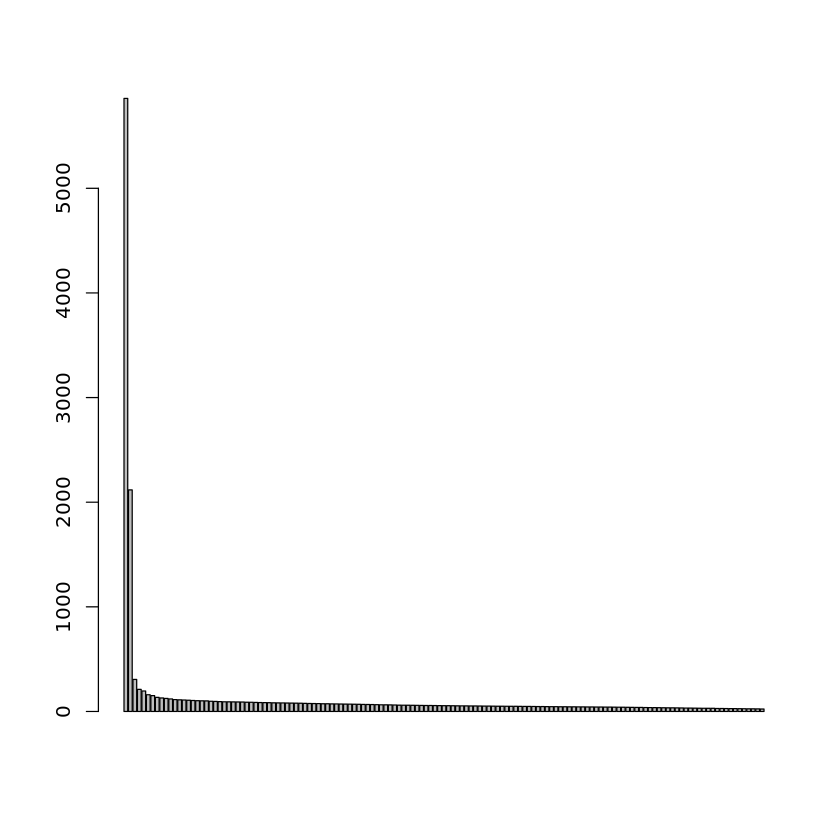

In [21]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = T)

In [22]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = F, nf = 5)

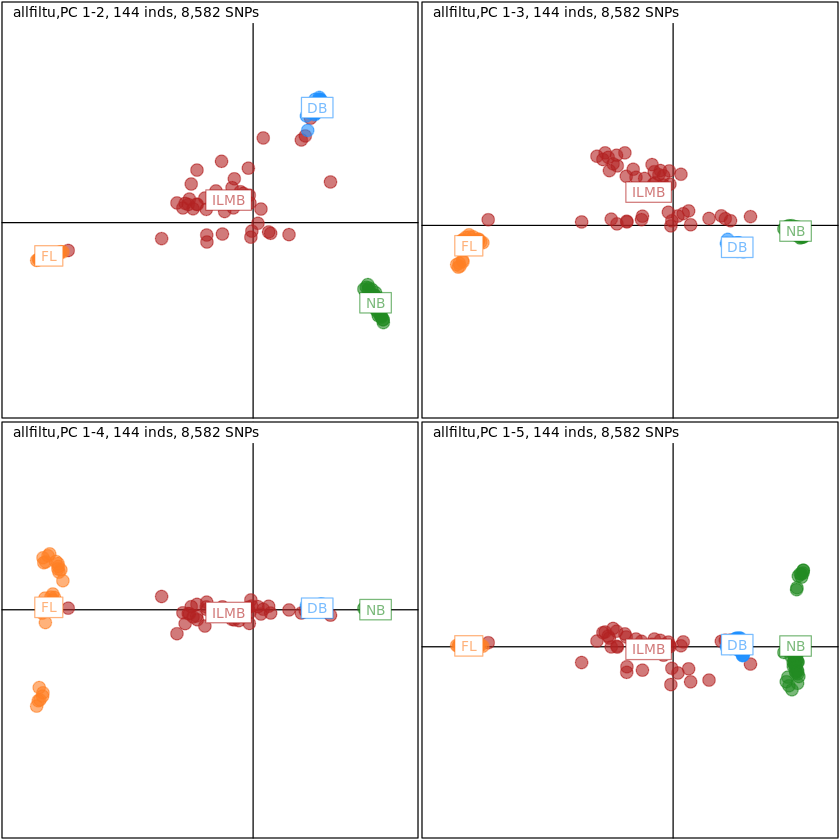

In [23]:
col6 <-  c("firebrick","dodgerblue","chocolate1","forestgreen")

par(mfrow=c(2,2))
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=2, 
        sub = "allfiltu,PC 1-2, 144 inds, 8,582 SNPs ",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=3, 
        sub = "allfiltu,PC 1-3, 144 inds, 8,582 SNPs ",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=4, 
        sub = "allfiltu,PC 1-4, 144 inds, 8,582 SNPs ",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=5, 
        sub = "allfiltu,PC 1-5, 144 inds, 8,582 SNPs ",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

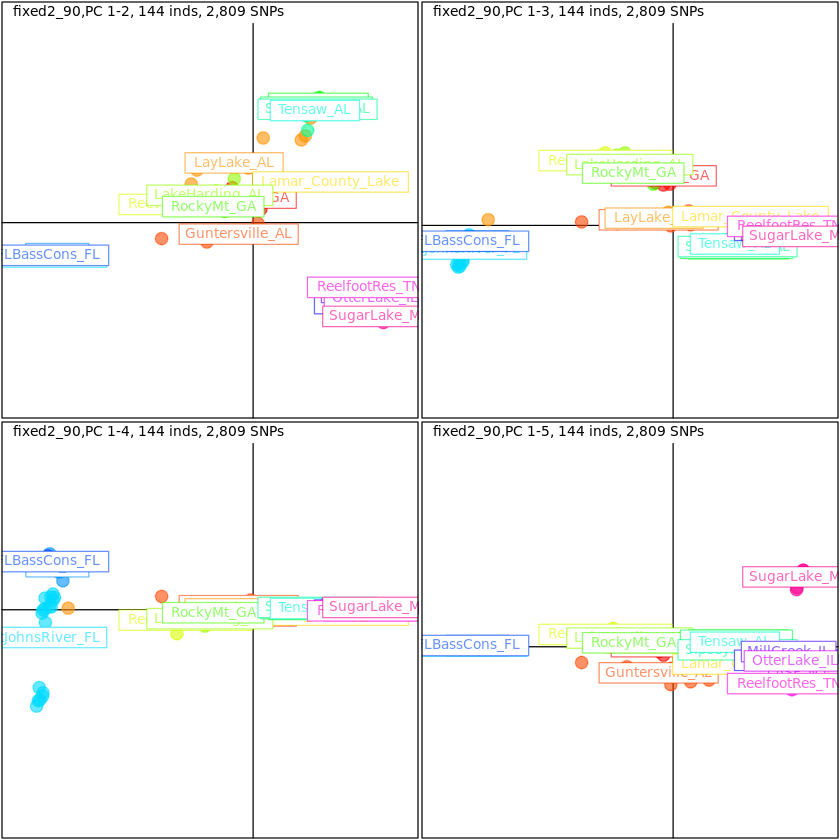

In [24]:
col21 <- rainbow(21)

par(mfrow=c(2,2))
s.class(pca$li, strata(u.na)$LOCATION,xax=1,yax=2, 
        sub = "fixed2_90,PC 1-2, 144 inds, 2,809 SNPs ",
        possub = "topleft",col=transp(col21,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$LOCATION,xax=1,yax=3, 
        sub = "fixed2_90,PC 1-3, 144 inds, 2,809 SNPs ",
        possub = "topleft",col=transp(col21,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$LOCATION,xax=1,yax=4, 
        sub = "fixed2_90,PC 1-4, 144 inds, 2,809 SNPs ",
        possub = "topleft",col=transp(col21,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$LOCATION,xax=1,yax=5, 
        sub = "fixed2_90,PC 1-5, 144 inds, 2,809 SNPs ",
        possub = "topleft",col=transp(col21,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

## Get clusters from PCA and assign individuals to clusters 
Use this for GBS stats

In [29]:
res.hcpc <- HCPC(pca$li, nb.clust = 4, graph = TRUE)

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan



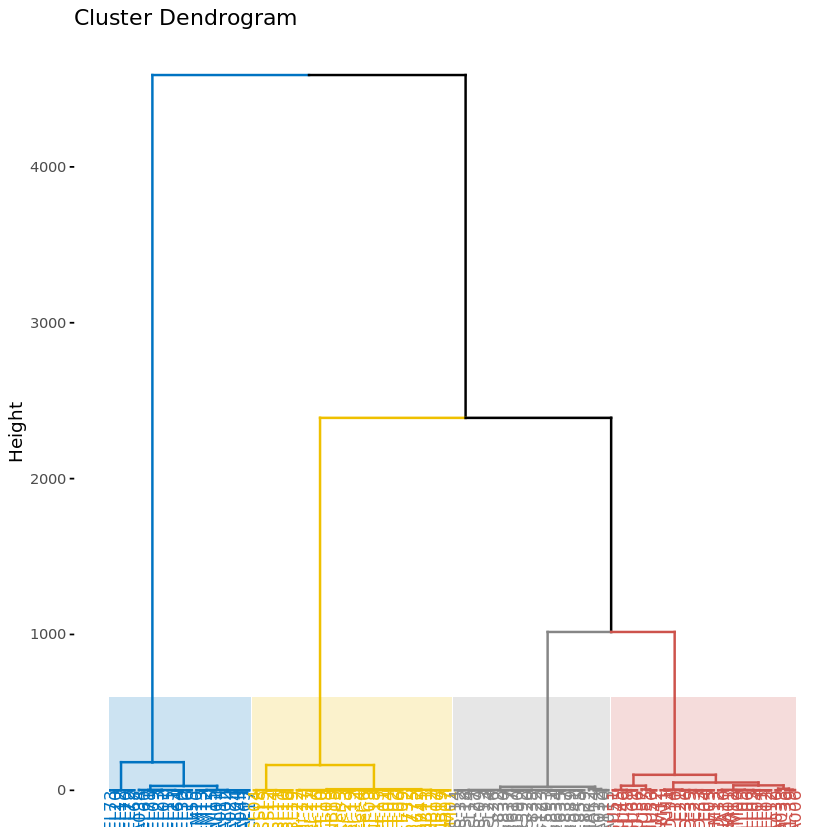

In [32]:
fviz_dend(res.hcpc, 
          cex = 0.7,                     # Label size
          palette = "jco",               # Color palette see ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE, # Add rectangle around groups
          rect_border = "jco",           # Rectangle color
          labels_track_height = 0.8      # Augment the room for labels
          )

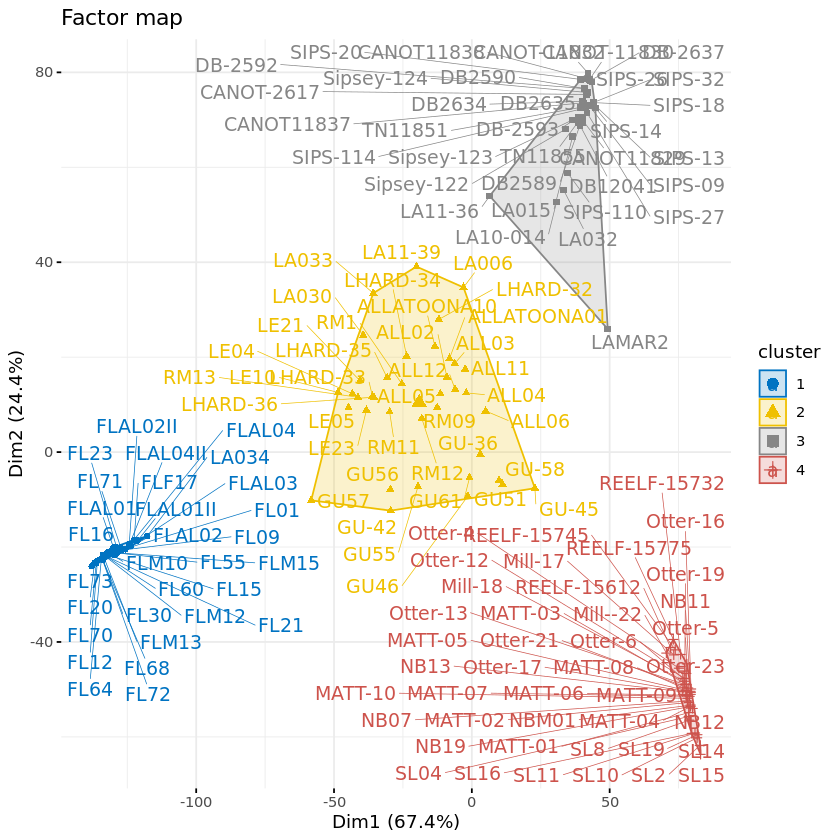

In [33]:
fviz_cluster(res.hcpc,
             repel = TRUE,            # Avoid label overlapping
             show.clust.cent = TRUE, # Show cluster centers
             palette = "jco",         # Color palette see ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

Warning message in title(main, sub, ...):
""palette" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""palette" is not a graphical parameter"


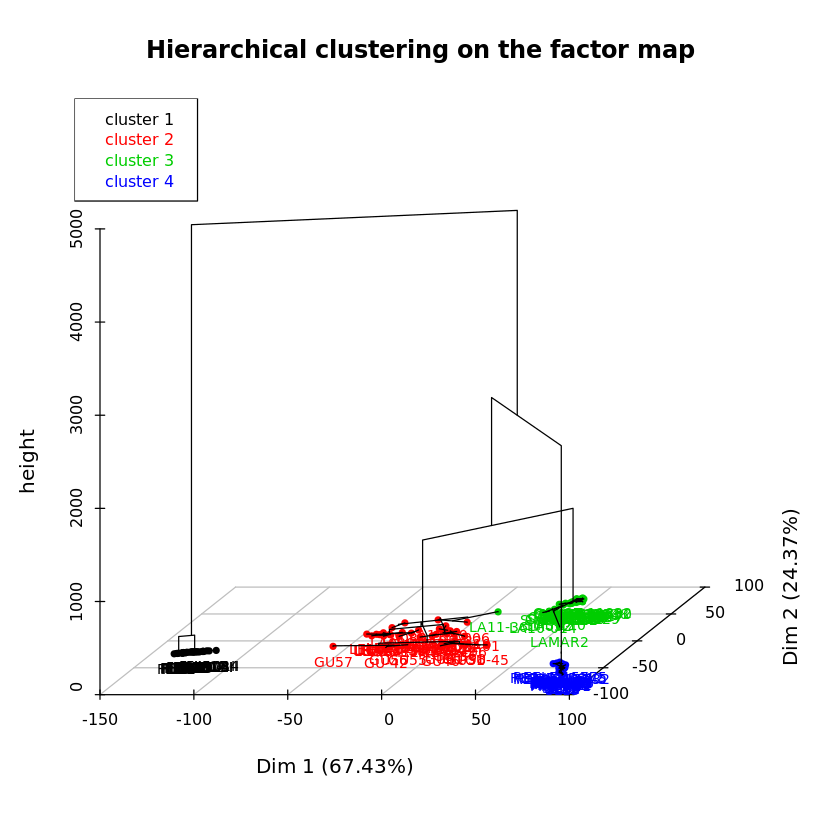

In [35]:
# Principal components + tree
plot(res.hcpc, choice = "3D.map",palette = "jco")

In [37]:
head(res.hcpc$data.clust)

,Axis1,Axis2,Axis3,Axis4,Axis5,clust
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
ALL02,-9.056960,15.786074,32.32338,-6.9052736,-3.06305509,2
ALL03,-6.221781,18.653332,25.73602,-0.2571755,1.35474901,2
ALL04,-2.039604,12.470531,26.24415,-1.6442978,0.09073707,2
ALL05,-11.428119,12.303382,27.18136,-4.2945305,0.32381355,2
ALL06,4.989328,8.655176,32.56982,-2.7164983,0.62559551,2
ALL11,-2.411625,17.482759,34.72175,-8.7051629,0.89615686,2


In [40]:
clusters <- res.hcpc$data.clust$clust
clusters <- c("FL","ILMB","DB","NB",clusters)[match(clusters, c("1","2","3","4",clusters))]
write.table(clusters,file="allfiltu_hcpc_labels",quote = F,row.names = F,col.names=F)

In [41]:
mystrats$CLUSTER <- clusters

stratted <- strata(allfiltu, formula= CLUSTER/POPULATION/LOCATION, combine = TRUE,mystrats)

In [42]:
save(stratted,file="allfiltu_stratted.genind")